In [26]:
import numpy as np
N=1000
miu=50
var=8

pop = list(np.random.normal(miu,var,size=(N)).astype(int))

In [27]:
import math
print(pop)
print(sum(pop)/len(pop))
ragam=0;
for z in pop:
    ragam+=((z-np.mean(pop))**2)/(N)
print(math.sqrt(ragam))
#Other function print(np.std(pop,ddof=0))

[63, 60, 45, 41, 50, 47, 25, 45, 53, 54, 39, 51, 51, 43, 38, 66, 52, 57, 52, 37, 55, 63, 75, 60, 50, 57, 56, 44, 43, 47, 54, 49, 50, 58, 42, 41, 53, 42, 48, 59, 51, 52, 43, 50, 53, 50, 53, 49, 44, 33, 49, 40, 41, 50, 51, 42, 50, 57, 43, 60, 36, 47, 36, 57, 65, 47, 64, 52, 45, 52, 62, 51, 63, 49, 47, 36, 40, 40, 58, 52, 45, 58, 51, 47, 64, 52, 34, 63, 53, 40, 43, 57, 29, 62, 56, 66, 61, 52, 59, 54, 30, 54, 49, 33, 55, 55, 53, 43, 60, 53, 46, 56, 42, 60, 48, 54, 49, 42, 41, 48, 42, 59, 57, 49, 46, 52, 52, 48, 37, 58, 57, 39, 55, 57, 51, 65, 48, 39, 65, 51, 46, 48, 38, 50, 58, 73, 48, 66, 57, 42, 61, 68, 48, 49, 53, 55, 67, 39, 53, 54, 50, 45, 43, 46, 61, 58, 44, 70, 56, 56, 55, 59, 44, 43, 46, 43, 48, 64, 45, 59, 63, 46, 55, 46, 48, 56, 55, 44, 40, 52, 59, 45, 42, 52, 41, 48, 58, 47, 47, 37, 41, 39, 40, 46, 49, 60, 45, 38, 74, 54, 46, 53, 34, 54, 46, 40, 52, 64, 44, 41, 50, 41, 41, 56, 50, 45, 57, 43, 50, 69, 56, 46, 47, 41, 66, 42, 60, 50, 55, 37, 58, 62, 57, 50, 47, 58, 49, 56, 47, 45,

C:\Users\istyw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


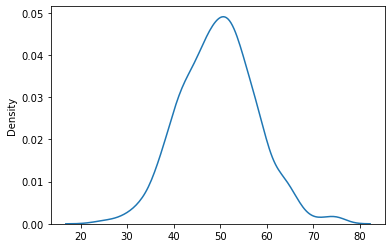

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(pop, hist=False)

plt.show()

In [29]:
lok_sampel=[]
n=5

In [30]:

#agar sampel tidak berulang
import random
for i in range(n):
    a=random.randint(0,N-1)
    if a not in lok_sampel:
        lok_sampel.append(a)


In [37]:
#Sampel 
sampel=[pop[i] for i in lok_sampel]
sampel


[47, 44, 47, 49, 52, 69, 34, 37, 33, 55]

C:\Users\istyw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


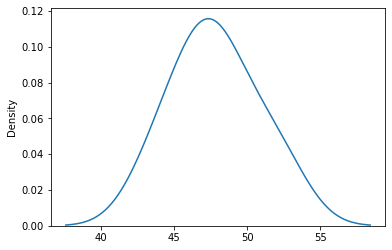

In [32]:

sns.distplot(sampel, hist=False)

plt.show()


In [33]:
import math
#Rerata dan standar deviasi:
xbar=sum(sampel)/len(sampel)
#bisa juga dengan xbar=np.mean(sampel) *kalau ada yg susah kenapa harus mudah
ragam=0;
for z in sampel:
    ragam+=((z-xbar)**2)/(n-1)
sd=math.sqrt(ragam)
#bisa juga dengan ragam=np.std(sampel,ddof=1) *kalau ada yg susah kenapa harus mudah
print(xbar)

47.8


In [34]:
import scipy.stats as st
#find T critical value
nilai_t=st.t.ppf(q=1-.05/2,df=n-1)
tolerance=nilai_t*sd/math.sqrt(n)
upper=max([xbar+tolerance,xbar-tolerance])
lower=min([xbar+tolerance,xbar-tolerance])


#bisa juga pakai 
#import scipy.stats as st
#st.t.interval(alpha=0.95, df=len(sampel)-1, loc=np.mean(sampel), scale=st.sem(sampel)) 

In [35]:
lower,upper

(44.13761737190286, 51.46238262809713)

In [36]:
#tambah sampel
t=5
for i in range(t):
    a=random.randint(0,N-1)
    if a not in lok_sampel:
        lok_sampel.append(a)


In [38]:
#Sampel 
sampel=[pop[i] for i in lok_sampel]
sampel


[47, 44, 47, 49, 52, 69, 34, 37, 33, 55]

In [40]:
st.t.interval(alpha=0.95, df=len(sampel)-1, loc=np.mean(sampel), scale=st.sem(sampel))

(38.972894378380104, 54.4271056216199)

In [245]:
st.ttest_1samp(a=sampel, popmean=57)

Ttest_1sampResult(statistic=-2.861994276017171, pvalue=0.04583714123245332)

In [246]:
#get all combinations of sample from the population-> NCn
import itertools
p = list(itertools.combinations(pop,n))

In [247]:
#calculate mean for all possible sample 
mean_miu=[]
for i in p:
    a=list(i)
    mean_miu.append(sum(a)/len(a))
sum(mean_miu)/len(mean_miu)

49.22999999999538

In [248]:
#Create list of mean of all possible sample that is between CI 
mean_miu_CI=[z for z in mean_miu if z>= lower and z<=upper]

In [249]:
#Calculate how many mean of possible sample is between CI 

len(mean_miu_CI)/len(mean_miu)

0.9174624160817092

In [74]:
#Perform Bootstrap Sampel
bs_sampel=[]
for i in range (100000):
    bs=[]
    for j in range (20):
        bs.append(sampel[random.randint(0,n-1)])
    bs_sampel.append(bs)
bs_sampel


[[4, 4, 4, 4, 3, 6, 6, 3, 6, 6, 4, 4, 8, 4, 6, 6, 4, 8, 3, 4],
 [8, 6, 6, 4, 6, 4, 4, 4, 4, 8, 6, 6, 3, 4, 4, 3, 6, 4, 3, 4],
 [8, 3, 3, 4, 4, 4, 4, 3, 4, 4, 6, 3, 8, 4, 6, 4, 6, 4, 8, 4],
 [4, 3, 4, 4, 6, 3, 4, 4, 3, 4, 4, 8, 6, 3, 4, 4, 4, 8, 4, 4],
 [4, 4, 4, 8, 3, 4, 4, 6, 6, 8, 3, 8, 8, 4, 4, 6, 4, 4, 6, 4],
 [4, 3, 4, 3, 8, 4, 4, 3, 4, 8, 3, 3, 3, 6, 6, 4, 4, 4, 4, 8],
 [6, 8, 4, 3, 4, 4, 4, 3, 4, 6, 3, 4, 4, 4, 6, 8, 4, 8, 8, 6],
 [4, 4, 4, 8, 8, 4, 4, 3, 8, 3, 4, 6, 4, 4, 4, 6, 4, 3, 8, 4],
 [3, 4, 8, 4, 3, 6, 8, 3, 3, 3, 3, 8, 6, 6, 4, 8, 3, 4, 4, 3],
 [4, 6, 4, 8, 3, 4, 8, 4, 4, 4, 3, 3, 4, 8, 4, 4, 3, 4, 6, 3],
 [3, 4, 4, 3, 8, 4, 4, 6, 3, 4, 4, 8, 3, 6, 4, 6, 4, 4, 4, 3],
 [6, 4, 6, 3, 6, 4, 4, 4, 4, 4, 4, 4, 3, 4, 6, 8, 3, 4, 6, 4],
 [8, 4, 4, 4, 6, 8, 4, 3, 4, 8, 3, 4, 4, 4, 3, 6, 4, 4, 6, 4],
 [6, 4, 6, 4, 3, 4, 4, 6, 8, 4, 4, 4, 4, 3, 6, 8, 4, 6, 4, 4],
 [4, 3, 4, 4, 3, 3, 4, 6, 6, 6, 3, 3, 3, 4, 3, 4, 4, 6, 6, 4],
 [4, 8, 4, 4, 4, 4, 8, 4, 4, 4, 4, 3, 6, 4, 4, 3, 8, 6,

In [75]:
bs_mean=[sum(z)/len(z) for z in bs_sampel]
bs_mean_mean=sum(bs_mean)/len(bs_mean)
bs_mean_mean,xbar



(4.600387999999996, 4.6)